In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
import control

# Criterio de estabilidad de Routh



Hasta el momento se ha mostrado que se puede identificar si un sistema LTI es estable o no al encontrar los polos del sistema, pues si TODOS los polos del sistema tienen  parte real negativa, el sistema es estable. Además, se ha evidenciado que al realimentar negativamente un sistema, los polos del sistema se desplazan a nuevas ubicaciones.

El [Criterio de estabilidad de Routh-Hurwitz](https://en.wikipedia.org/wiki/Routh%E2%80%93Hurwitz_stability_criterion) es una forma de determinar la estabilidad del sistema sin tener que calcular sus raíces. Además, al evitar el cálculo de las raíces, se evaden posibles errores al trabajar con polinomios de orden elevado.

**Ejemplo**

Suponga un proceso modelado por:

$$G_p(s) = \frac{1}{\left (s + 1\right )^{10}}$$

Las raíces del sistema son:

$$s_{1,2,3...,10} = -1$$

In [3]:
# Se define la función de transferencia del proceso
Gp = control.tf(1, [1,1])
Gp10 = Gp*Gp*Gp*Gp*Gp*Gp*Gp*Gp*Gp*Gp
Gp10

TransferFunction(array([1]), array([  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]))

In [4]:
Gp10.pole()

array([-1.05835839+0.j        , -1.04656789+0.03476893j,
       -1.04656789-0.03476893j, -1.01659732+0.05502978j,
       -1.01659732-0.05502978j, -0.98133256+0.05352511j,
       -0.98133256-0.05352511j, -0.95422344+0.0323362j ,
       -0.95422344-0.0323362j , -0.9441992 +0.j        ])

In [5]:
ceros = Gp10.zero()
ceros

array([], dtype=float64)

In [9]:
polos = (Gp*Gp*Gp*Gp).pole()
polos

array([-1.00026013+0.j        , -0.99999997+0.00026011j,
       -0.99999997-0.00026011j, -0.99973992+0.j        ])

Observe que los polos no están ubicados en $s=-1$. Estos errores se deben a las representaciones discretas de los números.

La función `routh` permite encontrar la matriz de Routh a partir de un objeto tipo `Poly` de `Sympy`


In [10]:
!pip install tbcontrol
from tbcontrol.symbolic import routh
help(routh)

Help on function routh in module tbcontrol.symbolic:

routh(p)
    Construct the Routh-Hurwitz array given a polynomial in s
    
    Input: p - a sympy.Poly object
    Output: The Routh-Hurwitz array as a sympy.Matrix object



In [11]:
s = sym.Symbol('s')

a0, a1, a2, a3, a4,a5,a6,a7,a8,a9,a10 = sym.symbols('a_0:11')
p = (a0 + a1*s**1 + a2*s**2 + a3*s**3 + a4*s**4 + a5*s**5 + 
     a6*s**6)
p = sym.Poly(p, s)
p

Poly(a_6*s**6 + a_5*s**5 + a_4*s**4 + a_3*s**3 + a_2*s**2 + a_1*s + a_0, s, domain='ZZ[a_0,a_1,a_2,a_3,a_4,a_5,a_6]')

In [12]:
routh(p)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                           a_6,                                                        a_4, a_2, a_0],
[                                                                                                                                                                                                                                                                                                                                                                                                           a_5,                                                        a_3, a_1,   0],
[                                              

El sistema es estable siempre que los elementos de la primera columna sean del mismo signo.

----------------------------------

¿Qué pasa con el sistema de décimo orden definido anteriormente?

In [15]:
Gp10Den

Poly(s**10 + 10*s**9 + 45*s**8 + 120*s**7 + 210*s**6 + 252*s**5 + 210*s**4 + 120*s**3 + 45*s**2 + 10*s + 1, s, domain='ZZ')

In [14]:
Coef_den = Gp10.den[0][0].tolist()
orden_den = len(Coef_den)-1
Gp10Den = 0
for val in Coef_den:
    Gp10Den = Gp10Den + val*s**(orden_den)
    orden_den = orden_den-1
Gp10Den = sym.Poly(Gp10Den, s)
routh(Gp10Den)

Matrix([
[          1,         45,      210,    210, 45, 1],
[         10,        120,      252,    120, 10, 0],
[         33,      924/5,      198,     44,  1, 0],
[         64,        192,    320/3, 320/33,  0, 0],
[      429/5,        143,       39,      1,  0, 0],
[      256/3,    2560/33, 1280/143,      0,  0, 0],
[         65,         30,        1,      0,  0, 0],
[  16384/429, 16384/2145,        0,      0,  0, 0],
[         17,          1,        0,      0,  0, 0],
[65536/12155,          0,        0,      0,  0, 0],
[          1,          0,        0,      0,  0, 0]])

In [19]:
Gp10Den

Poly(s**10 + 10*s**9 + 45*s**8 + 120*s**7 + 210*s**6 + 252*s**5 + 210*s**4 + 120*s**3 + 45*s**2 + 10*s + 1, s, domain='ZZ')

Todos los elementos de la primera columna son positivos, por lo cuál el sistema es estable.

¿y si se realimenta y se configura un controlador $G_c(s) = k_c$?

In [16]:
kc = sym.symbols('k_c', real=True,positive = True)

##########################################
Coef_num = Gp10.num[0][0].tolist()
orden_num = len(Coef_num)-1
Gp10Num = 0
for val in Coef_num:
    Gp10Num = Gp10Num + val*s**(orden_num)
    orden_num = orden_num-1
Gp10Num = sym.Poly(Gp10Num, s)
##########################################
Coef_den = Gp10.den[0][0].tolist()
orden_den = len(Coef_den)-1
Gp10Den = 0
for val in Coef_den:
    Gp10Den = Gp10Den + val*s**(orden_den)
    orden_den = orden_den-1
Gp10Den = sym.Poly(Gp10Den, s)
#########################################3
### DenominadorLC = Nc*Np + Dc*Dp
A = routh(kc*Gp10Num + Gp10Den)
A

Matrix([
[                                                                                                                                                             1,                                                           45,                    210,                210,      45, k_c + 1],
[                                                                                                                                                            10,                                                          120,                    252,                120,      10,       0],
[                                                                                                                                                            33,                                                        924/5,                    198,                 44, k_c + 1,       0],
[                                                                                                                                    

In [28]:
resp = sym.solve([e > 0 for e in A[:, 0]], kc)
resp

(k_c < -93184/25 + 45056*sqrt(39)/75) & ((k_c < -93184/25 + 45056*sqrt(39)/75) | (32*CRootOf(375*k_c**3 + 537303*k_c**2 - 1682304*k_c - 226304, 2) < k_c)) & ((k_c < -62976 + 28160*sqrt(5)) | (k_c < 512/5 - 5632*sqrt(5)/125) | ((k_c < 5632*sqrt(5)/125 + 512/5) & (32*CRootOf(375*k_c**3 + 537303*k_c**2 - 1682304*k_c - 226304, 2) < k_c)))

In [31]:
resp.as_dummy()

(k_c < -93184/25 + 45056*sqrt(39)/75) & ((k_c < -93184/25 + 45056*sqrt(39)/75) | (32*CRootOf(375*k_c**3 + 537303*k_c**2 - 1682304*k_c - 226304, 2) < k_c)) & ((k_c < -62976 + 28160*sqrt(5)) | (k_c < 512/5 - 5632*sqrt(5)/125) | ((k_c < 5632*sqrt(5)/125 + 512/5) & (32*CRootOf(375*k_c**3 + 537303*k_c**2 - 1682304*k_c - 226304, 2) < k_c)))

Esto indica que $k_c<1.652$ permite obtener un sistema estable en lazo cerrado.

In [32]:
k1 = 1.6
k2 = 1.7

Gp10LC1 = control.feedback(k1*Gp10,1)
Gp10LC2 = control.feedback(k2*Gp10,1)


In [33]:
routh(k1*Gp10Num + Gp10Den)

Matrix([
[              1.0,             45.0,            210.0,            210.0, 45.0, 2.6],
[             10.0,            120.0,            252.0,            120.0, 10.0,   0],
[             33.0,            184.8,            198.0,             44.0,  2.6,   0],
[             64.0,            192.0, 106.666666666667, 9.21212121212121,    0,   0],
[             85.8,            143.0,            39.25,              2.6,    0,   0],
[ 85.3333333333333, 77.3892773892774, 7.27272727272727,                0,    0,   0],
[          65.1875,          31.9375,              2.6,                0,    0,   0],
[ 35.5816711252953, 3.86921177256748,                0,                0,    0,   0],
[ 24.8488997615212,              2.6,                0,                0,    0,   0],
[0.146216154506988,                0,                0,                0,    0,   0],
[              2.6,                0,                0,                0,    0,   0]])

In [34]:
routh(k2*Gp10Num + Gp10Den)

Matrix([
[               1.0,             45.0,            210.0,            210.0, 45.0, 2.7],
[              10.0,            120.0,            252.0,            120.0, 10.0,   0],
[              33.0,            184.8,            198.0,             44.0,  2.7,   0],
[              64.0,            192.0, 106.666666666667, 9.18181818181818,    0,   0],
[              85.8,            143.0,        39.265625,              2.7,    0,   0],
[  85.3333333333333, 77.3776223776224, 7.16783216783217,                0,    0,   0],
[       65.19921875,      32.05859375,              2.7,                0,    0,   0],
[  35.4190419051122, 3.63404749345675,                0,                0,    0,   0],
[  25.3690548825024,              2.7,                0,                0,    0,   0],
[-0.135561330629251,                0,                0,                0,    0,   0],
[               2.7,                0,                0,                0,    0,   0]])

(array([-1.99682363+0.32388763j, -1.99682363-0.32388763j,
        -1.61607088+0.84794883j, -1.61607088-0.84794883j,
        -1.        +1.04812239j, -1.        -1.04812239j,
        -0.38392912+0.84794883j, -0.38392912-0.84794883j,
        -0.00317637+0.32388763j, -0.00317637-0.32388763j]),
 array([], dtype=float64))

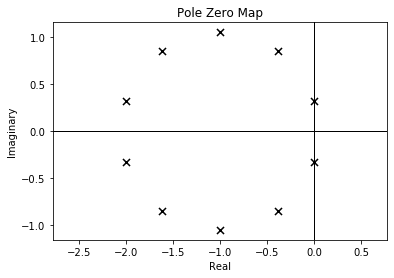

In [35]:
control.pzmap(Gp10LC1)

(array([-2.00288519+0.32585715j, -2.00288519-0.32585715j,
        -1.61981713+0.8531051j , -1.61981713-0.8531051j ,
        -1.        +1.05449589j, -1.        -1.05449589j,
        -0.38018287+0.8531051j , -0.38018287-0.8531051j ,
         0.00288519+0.32585715j,  0.00288519-0.32585715j]),
 array([], dtype=float64))

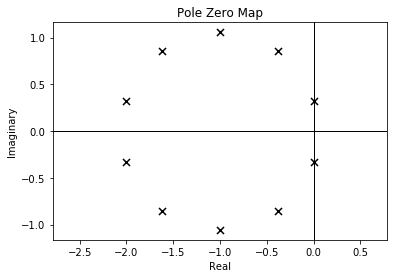

In [36]:
control.pzmap(Gp10LC2)

Considere un proceso modelado por:

$$G_p(s) = \frac{s+3}{\left (s+2 \right )\left (s+1 \right )} $$

y un controlador $G_c(s)=k_c$

Encuentre qué valores de $k_c$ permiten que el sistema en lazo cerrado sea estable.